In [76]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv("C:/Users/vamsi/Downloads/blood sugar/dataset.csv")
#df=pd.read_csv("C:/Users/vamsi/OneDrive/Documents/research/diabetes_norm.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
df.shape 

(768, 9)

In [79]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [80]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [81]:
from sklearn.metrics import classification_report, confusion_matrix


In [82]:
def mscore(model):
    print("Train score : ",model.score(x_train,y_train))
    print("Test score : ",model.score(x_test,y_test))


def eval_model(ytest,ypred):
    print("Confusion Matrix : \n",confusion_matrix(ytest,ypred))
    print("Classifcation Report : \n",classification_report(ytest,ypred))




In [451]:
#x = df.iloc[:, 0:7].values
#y = df.iloc[:, 8].values

x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]


In [526]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [523]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [527]:
m1= LogisticRegression(solver='newton-cg', max_iter=150)
m1.fit(x_train, y_train)

LogisticRegression(max_iter=150, solver='newton-cg')

In [528]:
mscore(m1)

Train score :  0.7638888888888888
Test score :  0.8125


In [529]:
predictions=m1.predict(x_test)
score1=m1.score(x_test,y_test)
print(score1)


0.8125


In [530]:
ypred_m1 = m1.predict(x_test)
eval_model(y_test,ypred_m1)

Confusion Matrix : 
 [[109  10]
 [ 26  47]]
Classifcation Report : 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       119
           1       0.82      0.64      0.72        73

    accuracy                           0.81       192
   macro avg       0.82      0.78      0.79       192
weighted avg       0.81      0.81      0.81       192



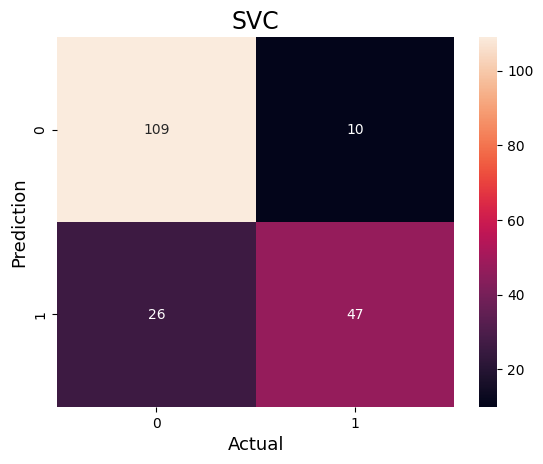

In [531]:
CM = confusion_matrix(y_test,ypred_m1)

sns.heatmap(CM, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Logistic Regression',fontsize=17)
plt.show()

In [184]:
ypred_m1 = m1.predict(x_test)
r2 = round(r2_score(y_test, ypred_m1),3)
absolute = round(mean_absolute_error(y_test, ypred_m1),3)
squared = round(mean_squared_error(y_test, ypred_m1),3)
print()
print("r2_score:",end=" ")
print(r2)
print()
print("mean_absolute_error:",end=" ")
print(absolute)
print()
print("mean_squared_error",end=" ")
print(squared)
print()


r2_score: 0.142

mean_absolute_error: 0.188

mean_squared_error 0.188



In [185]:

sns.regplot(x=x_test, y=ypred_m1, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

ValueError: regplot inputs must be 1d

In [142]:
m2 = KNeighborsClassifier(n_neighbors=5)
m2.fit(x_train,y_train)



KNeighborsClassifier()

In [143]:
mscore(m2)

Train score :  0.7847222222222222
Test score :  0.765625


In [144]:
ypred_m2 = m2.predict(x_test)
eval_model(y_test,ypred_m2)

Confusion Matrix : 
 [[107  21]
 [ 24  40]]
Classifcation Report : 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       128
           1       0.66      0.62      0.64        64

    accuracy                           0.77       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.76      0.77      0.76       192



In [145]:
ypred_m2 = m2.predict(x_test)
r2 = round(r2_score(y_test, ypred_m2),3)
absolute = round(mean_absolute_error(y_test, ypred_m2),3)
squared = round(mean_squared_error(y_test, ypred_m2),3)
print()
print("r2_score:",end=" ")
print(r2)
print()
print("mean_absolute_error:",end=" ")
print(absolute)
print()
print("mean_squared_error",end=" ")
print(squared)
print()


r2_score: -0.055

mean_absolute_error: 0.234

mean_squared_error 0.234



In [544]:
m3= SVC(kernel="linear",C=10)
m3.fit(x_train,y_train)


SVC(C=10, kernel='linear')

In [545]:
mscore(m3)

Train score :  0.7638888888888888
Test score :  0.8072916666666666


In [465]:
ypred_m3 = m3.predict(x_test)
eval_model(y_test,ypred_m3)


Confusion Matrix : 
 [[118  10]
 [ 22  42]]
Classifcation Report : 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       128
           1       0.81      0.66      0.72        64

    accuracy                           0.83       192
   macro avg       0.83      0.79      0.80       192
weighted avg       0.83      0.83      0.83       192



In [271]:
a=open("chart.csv","w+")

for i in y_test:
    a.write(str(i)+"\n")


In [284]:
ypred_m3 = m3.predict(x_test)
r2 = round(r2_score(y_test, ypred_m3),3)
absolute = round(mean_absolute_error(y_test, ypred_m3),3)
squared = round(mean_squared_error(y_test, ypred_m3),3)
print()
print("r2_score:",end=" ")
print(r2)
print()
print("mean_absolute_error:",end=" ")
print(absolute)
print()
print("mean_squared_error",end=" ")
print(squared)
print()


r2_score: 0.109

mean_absolute_error: 0.198

mean_squared_error 0.198



In [2]:
CM = confusion_matrix(y_test,ypred_m3)

sns.heatmap(CM, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SVC',fontsize=17)
plt.show()

NameError: name 'confusion_matrix' is not defined

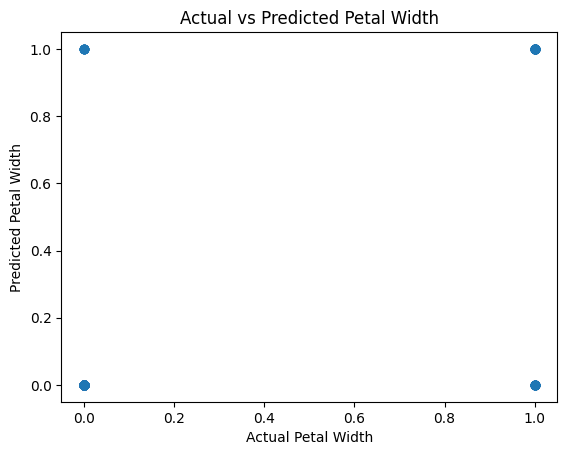

In [151]:

u=np.array(y_test)
k=u.reshape(-1,1)

v=np.array(ypred_m3)
l=v.reshape(-1,1)
plt.scatter(k, l)
plt.xlabel('Actual Petal Width')
plt.ylabel('Predicted Petal Width')
plt.title('Actual vs Predicted Petal Width')
plt.show()

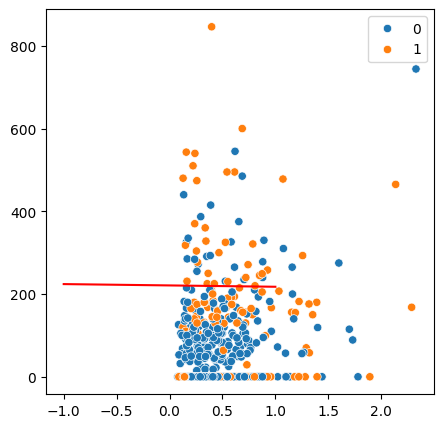

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
# Plotting our two-features-space
sns.scatterplot(x=x_train[:, 6], 
                y=x_train[:, 4], 
                hue=y_train,);
# Constructing a hyperplane using a formula.
w = m3.coef_[0]           # w consists of 2 elements
b = m3.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

NAIVE BAYES

In [201]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [202]:
m4 = GaussianNB()

# fit the model with the training data
m4.fit(x_train,y_train)



GaussianNB()

In [228]:
mscore(m4)

Train score :  0.75
Test score :  0.7916666666666666


In [226]:
ypred_m4 = m4.predict(x_test)
eval_model(y_test,ypred_m4)

Confusion Matrix : 
 [[107  19]
 [ 21  45]]
Classifcation Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       126
           1       0.70      0.68      0.69        66

    accuracy                           0.79       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.79      0.79      0.79       192



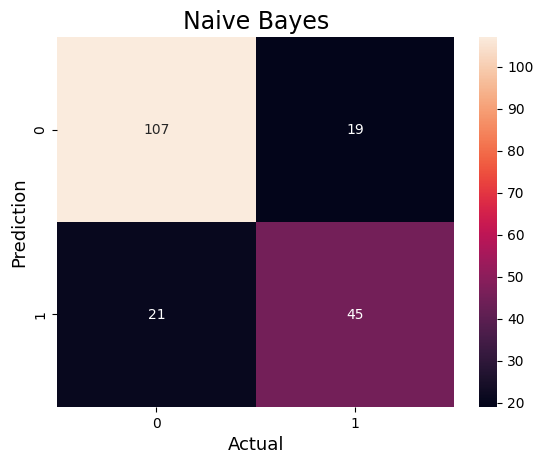

In [274]:
CM = confusion_matrix(y_test,ypred_m4)

sns.heatmap(CM, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Naive Bayes',fontsize=17)
plt.show()

In [206]:
ypred_m4 = m4.predict(x_test)
r2 = round(r2_score(y_test, ypred_m4),3)
absolute = round(mean_absolute_error(y_test, ypred_m4),3)
squared = round(mean_squared_error(y_test, ypred_m4),3)
print()
print("r2_score:",end=" ")
print(r2)
print()
print("mean_absolute_error:",end=" ")
print(absolute)
print()
print("mean_squared_error",end=" ")
print(squared)
print()


r2_score: 0.086

mean_absolute_error: 0.203

mean_squared_error 0.203



XG boost

In [158]:
from xgboost import XGBClassifier

In [159]:

m5= XGBClassifier()
# fit the model with the training data
m5.fit(x_train,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [160]:
mscore(m5)

Train score :  1.0
Test score :  0.71875


In [161]:
ypred_m5 = m5.predict(x_test)
eval_model(y_test,ypred_m5)

Confusion Matrix : 
 [[92 36]
 [18 46]]
Classifcation Report : 
               precision    recall  f1-score   support

           0       0.84      0.72      0.77       128
           1       0.56      0.72      0.63        64

    accuracy                           0.72       192
   macro avg       0.70      0.72      0.70       192
weighted avg       0.74      0.72      0.73       192



In [162]:
ypred_m5 = m5.predict(x_test)
r2 = round(r2_score(y_test, ypred_m5),3)
absolute = round(mean_absolute_error(y_test, ypred_m5),3)
squared = round(mean_squared_error(y_test, ypred_m5),3)
print()
print("r2_score:",end=" ")
print(r2)
print()
print("mean_absolute_error:",end=" ")
print(absolute)
print()
print("mean_squared_error",end=" ")
print(squared)
print()


r2_score: -0.266

mean_absolute_error: 0.281

mean_squared_error 0.281



Random forest 


In [221]:
from sklearn.ensemble import RandomForestClassifier

m6= RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

m6.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

c

In [222]:
mscore(m6)


Train score :  0.8472222222222222
Test score :  0.8072916666666666


In [230]:
ypred_m6 = m6.predict(x_test)
eval_model(y_test,ypred_m6)

Confusion Matrix : 
 [[107  19]
 [ 18  48]]
Classifcation Report : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       126
           1       0.72      0.73      0.72        66

    accuracy                           0.81       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192



In [231]:
ypred_m6 = m6.predict(x_test)
r2 = round(r2_score(y_test, ypred_m6),3)
absolute = round(mean_absolute_error(y_test, ypred_m6),3)
squared = round(mean_squared_error(y_test, ypred_m6),3)
print()
print("r2_score:",end=" ")
print(r2)
print()
print("mean_absolute_error:",end=" ")
print(absolute)
print()
print("mean_squared_error",end=" ")
print(squared)
print()


r2_score: 0.146

mean_absolute_error: 0.193

mean_squared_error 0.193



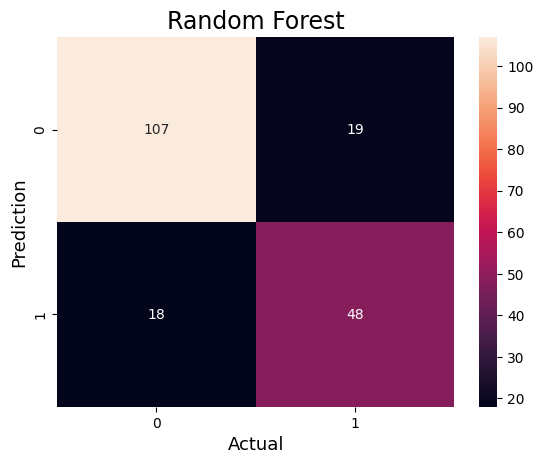

In [273]:
CM = confusion_matrix(y_test,ypred_m6)

sns.heatmap(CM, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest',fontsize=17)
plt.show()